In [2]:
import pandas as pd

# Load data
df = pd.read_csv(r"C:\10x AIMastery\rag-financial-feedback\data\Data\complaints.csv.zip")

# Show first 5 rows
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_25160\2888048068.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\10x AIMastery\rag-financial-feedback\data\Data\complaints.csv.zip")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [3]:
# Shape of data
df.shape

# Check for missing values
df.isnull().sum()

# Show column names
df.columns


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

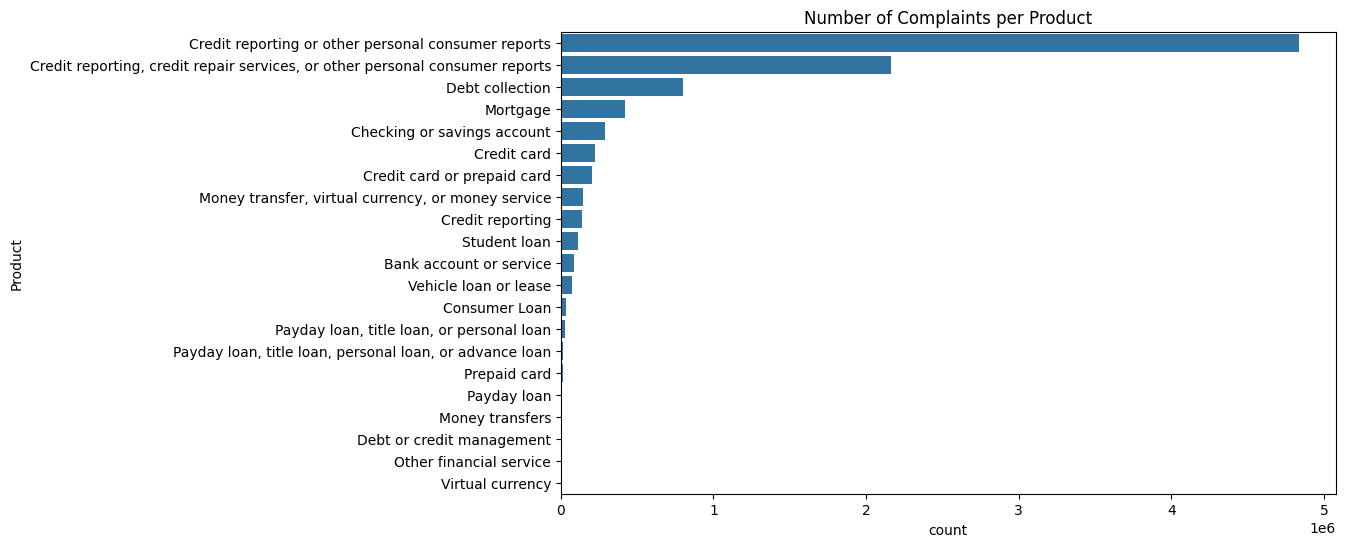

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of complaints per product
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Product'], order=df['Product'].value_counts().index)
plt.title("Number of Complaints per Product")
plt.show()


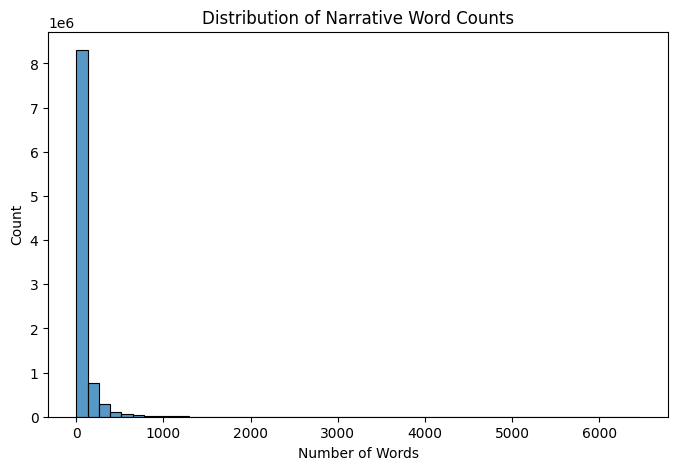

In [5]:
# Check text length of each complaint
df['narrative_length'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['narrative_length'], bins=50)
plt.title("Distribution of Narrative Word Counts")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()


In [6]:
# Count complaints with and without narratives
df['has_narrative'] = df['Consumer complaint narrative'].notnull()
df['has_narrative'].value_counts()


has_narrative
False    6629041
True     2980756
Name: count, dtype: int64

In [7]:
products_of_interest = [
    "Credit card",
    "Personal loan",
    "Buy Now, Pay Later (BNPL)",
    "Savings account",
    "Money transfers"
]

# Filter dataset
filtered_df = df[df['Product'].isin(products_of_interest)]
filtered_df = filtered_df[filtered_df['Consumer complaint narrative'].notnull()]
filtered_df = filtered_df.copy()


In [8]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # remove special characters
    text = re.sub(r"i am writing.*?complaint", "", text)  # optional boilerplate
    return text.strip()

filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)


In [9]:
# Save to data/processed or data/filtered_complaints.csv
filtered_df.to_csv('../data/processed/filtered_complaints.csv', index=False)


🧠 Total documents to embed: 412009


🔄 Adding to ChromaDB: 100%|██████████| 83/83 [13:03:52<00:00, 566.65s/it]    

✅ ChromaDB vector store created and persisted.
